In [21]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [22]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [23]:
print(train_scaled.shape, val_scaled.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1)


In [24]:
model = keras.Sequential()

In [25]:
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28,28,1)))

In [26]:
model.add(keras.layers.MaxPooling2D(2))

In [27]:
model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

In [28]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               313700    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)              

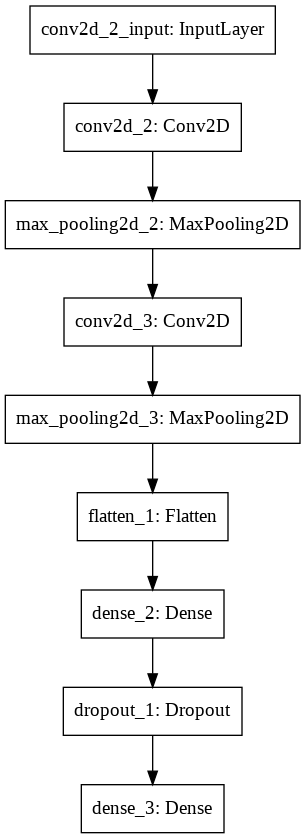

In [30]:
keras.utils.plot_model(model)

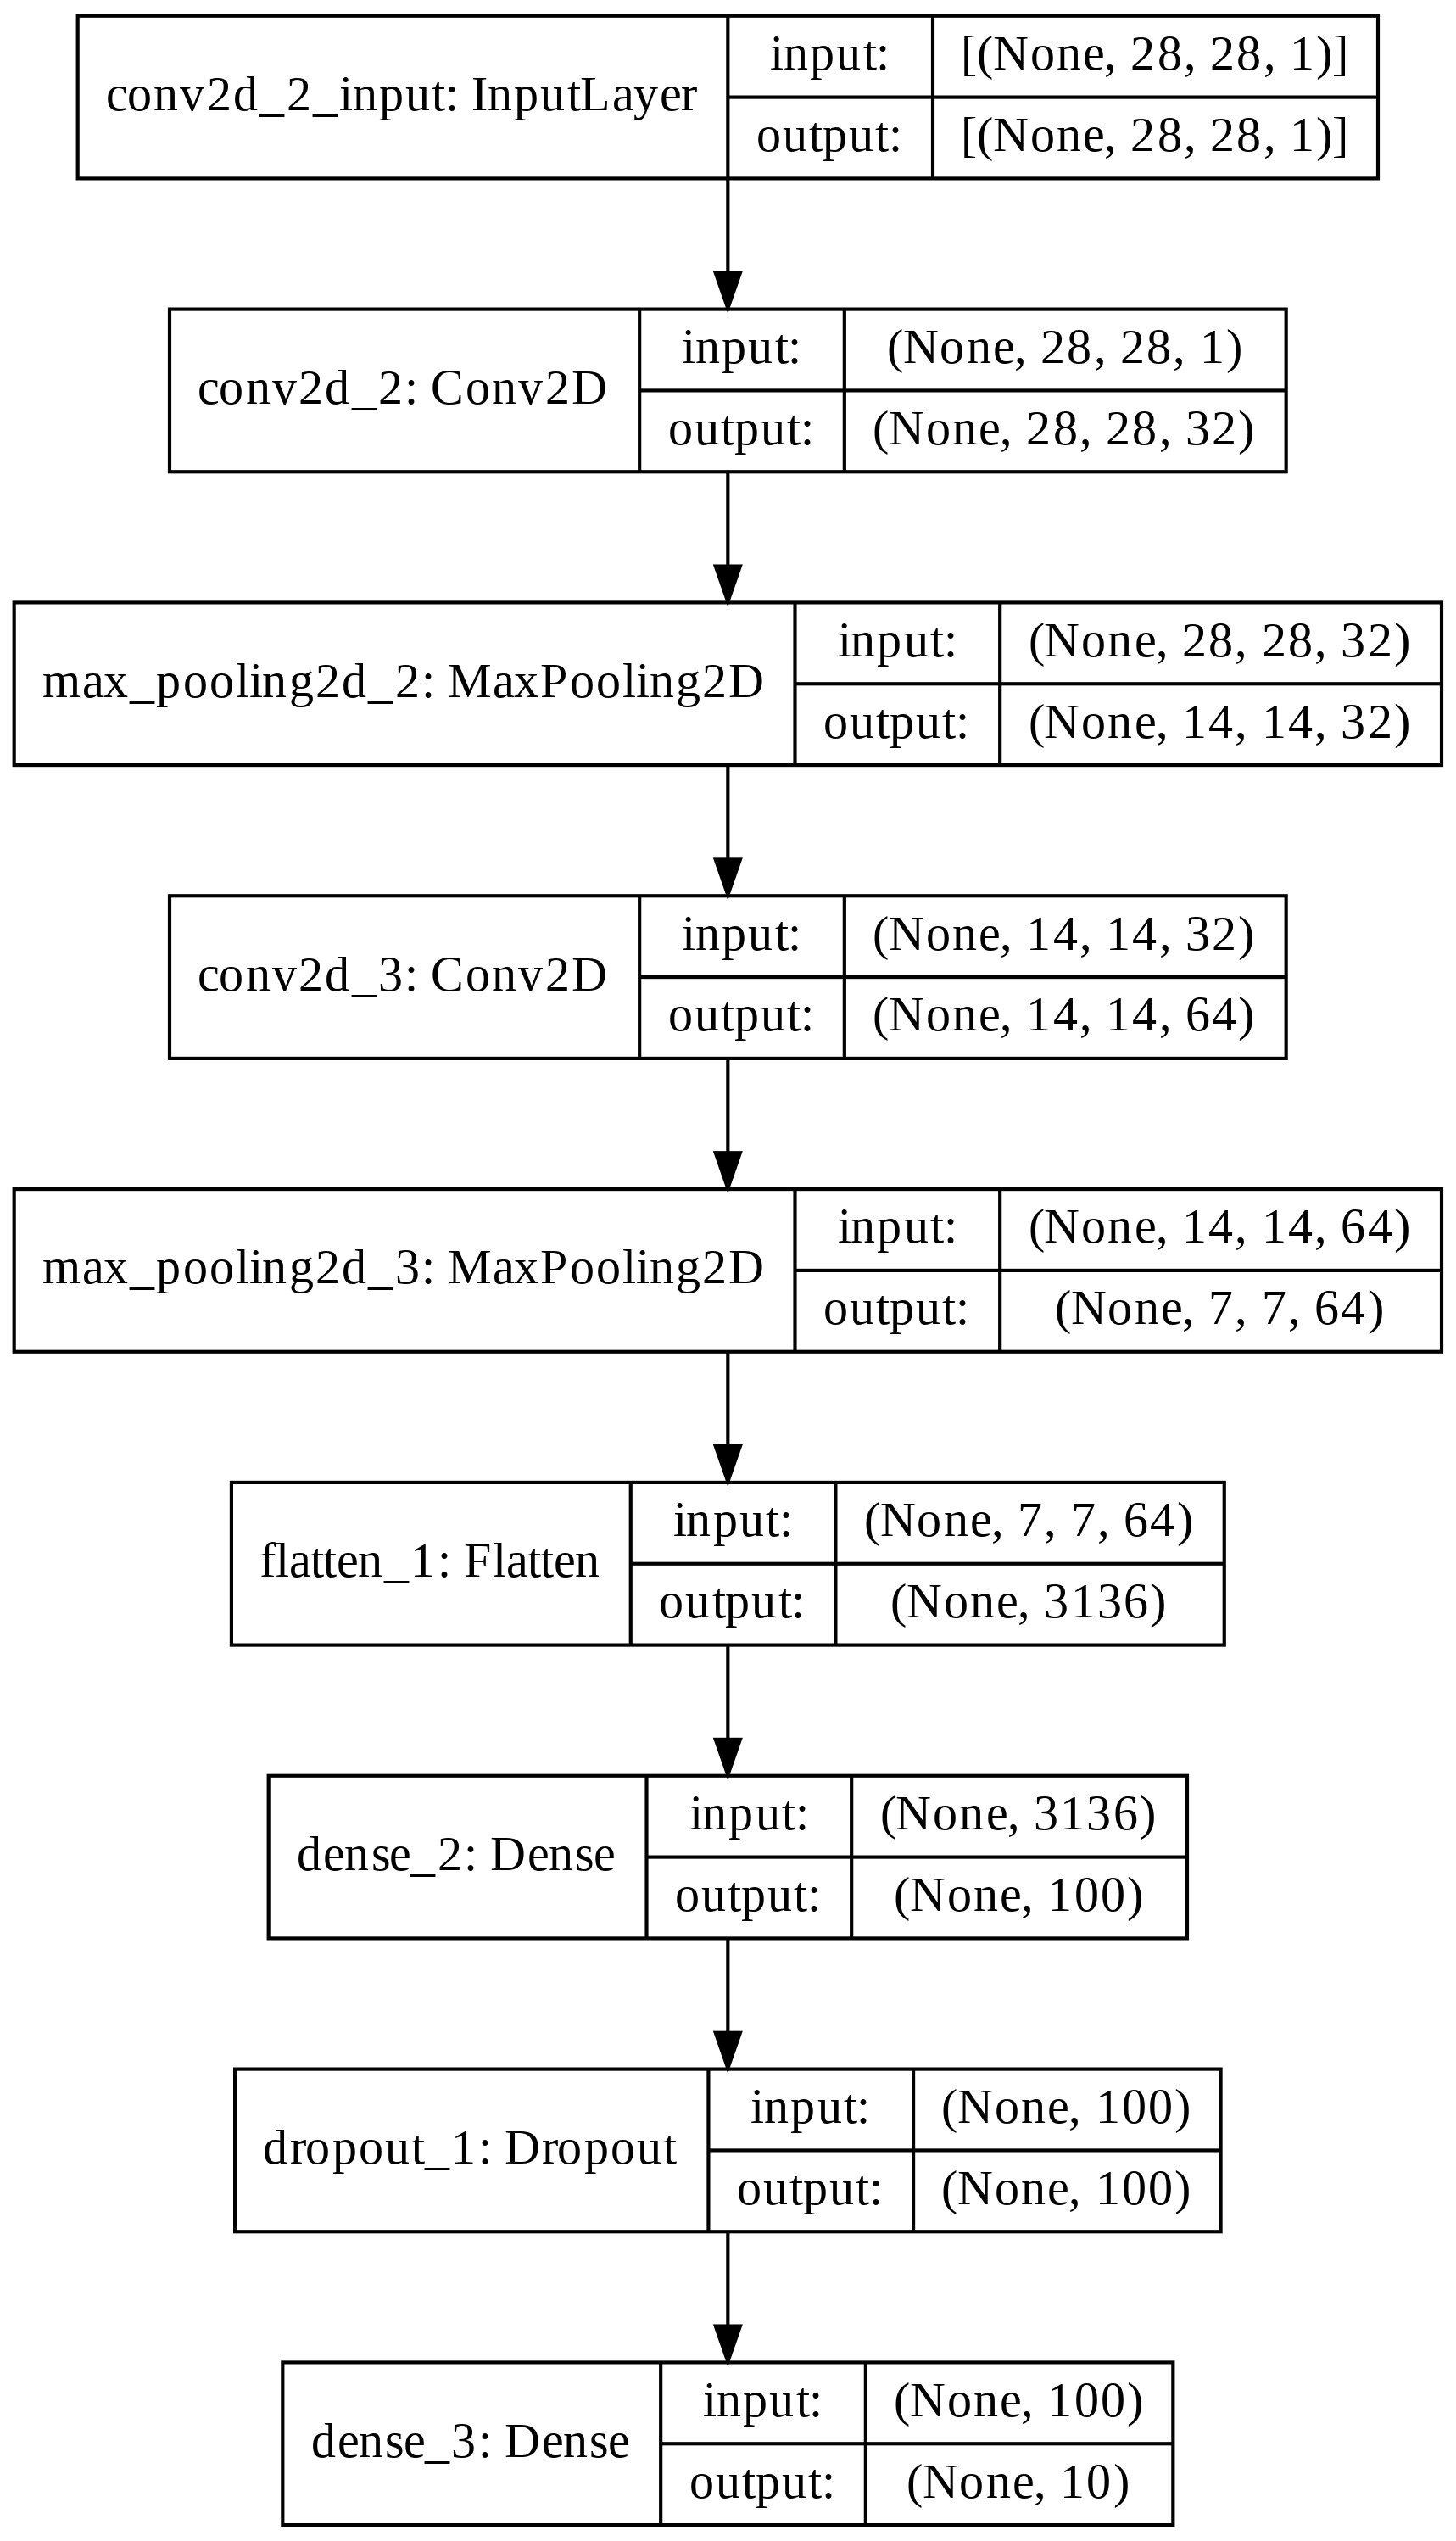

In [31]:
keras.utils.plot_model(model, show_shapes=True, to_file = 'cnn-architecture.png', dpi = 300)

In [32]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 66s 43ms/step - loss: 0.5294 - accuracy: 0.8095 - val_loss: 0.3204 - val_accuracy: 0.8814
Epoch 2/20
1500/1500 [==============================] - 62s 42ms/step - loss: 0.3498 - accuracy: 0.8745 - val_loss: 0.2817 - val_accuracy: 0.8957
Epoch 3/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.3024 - accuracy: 0.8913 - val_loss: 0.2563 - val_accuracy: 0.9070
Epoch 4/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2668 - accuracy: 0.9040 - val_loss: 0.2420 - val_accuracy: 0.9103
Epoch 5/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.2432 - accuracy: 0.9100 - val_loss: 0.2390 - val_accuracy: 0.9123
Epoch 6/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.2228 - accuracy: 0.9187 - val_loss: 0.2321 - val_accuracy: 0.9158
Epoch 7/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.2068 - accuracy: 0.9239 - val_loss: 0.2309 -